In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
from collections import Counter, defaultdict
import sys
import pickle
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import style
from wordcloud import WordCloud
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [2]:
harvard = pd.read_csv("../data/harvard_words_tokenized.csv")
harvard = harvard.drop("Unnamed: 0", axis=1)
song_lyrics = pickle.load(open("../data/pickle/FinalData/df_concat.pickle", "rb"))
bag_of_words = pickle.load(open("../data/pickle/FinalData/bag_of_words_concat.pickle", "rb"))

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (64,109,110,111,177) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
harvard.head()

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,Active,Passive,Pleasur,Pain,Feel,Arousal,EMOT,Virtue,Vice,Ovrst,Undrst,Academ,Doctrin,Econ@,Exch,ECON,Exprsv,Legal,Milit,Polit@,POLIT,Relig,Role,COLL,Work,Ritual,SocRel,Race,Kin@,MALE,Female,Nonadlt,HU,ANI,PLACE,Social,Region,Route,Aquatic,Land,Sky,Object,Tool,Food,Vehicle,BldgPt,ComnObj,NatObj,BodyPt,ComForm,COM,Say,Need,Goal,Try,Means,Persist,Complet,Fail,NatrPro,Begin,Vary,Increas,Decreas,Finish,Stay,Rise,Exert,Fetch,Travel,Fall,Think,Know,Causal,Ought,Perceiv,Compare,Eval@,EVAL,Solve,Abs@,ABS,Quality,Quan,NUMB,ORD,CARD,FREQ,DIST,Time@,TIME,Space,POS,DIM,Rel,COLOR,Self,Our,You,Name,Yes,No,Negate,Intrj,IAV,DAV,SV,IPadj,IndAdj,PowGain,PowLoss,PowEnds,PowAren,PowCon,PowCoop,PowAuPt,PowPt,PowDoct,PowAuth,PowOth,PowTot,RcEthic,RcRelig,RcGain,RcLoss,RcEnds,RcTot,RspGain,RspLoss,RspOth,RspTot,AffGain,AffLoss,AffPt,AffOth,AffTot,WltPt,WltTran,WltOth,WltTot,WlbGain,WlbLoss,WlbPhys,WlbPsyc,WlbPt,WlbTot,EnlGain,EnlLoss,EnlEnds,EnlPt,EnlOth,EnlTot,SklAsth,SklPt,SklOth,SklTOT,TrnGain,TrnLoss,TranLw,MeansLw,EndsLw,ArenaLw,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othrtags,Defined
0,a,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET ART,| article: Indefinite singular article--some o...
1,abandon,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,Weak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AffLoss,NaN,NaN,AffTot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
2,abandonment,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,Weak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
3,abate,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Passive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decreas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAV,NaN,NaN,

In [4]:
cols = harvard.columns.tolist()
binary_cols = list()
for i in range(2, len(cols)):
    tmp = {j: 0 for j in harvard[cols[i]]}.keys()
    if len(tmp) == 2 and np.nan in tmp:
#         print(cols[i], {j: 0 for j in harvard[cols[i]]}.keys())
        binary_cols.append(cols[i])

In [5]:
for c in binary_cols:
    harvard[c] = [1 if i == c else 0 for i in harvard[c]]

In [6]:
rest_cols = list(set(harvard.columns.tolist()) - set(binary_cols))
rest_cols

['Othrtags',
 'You',
 'Our',
 'Say',
 'Defined',
 'Self',
 'Anomie',
 'Source',
 'Entry']

In [7]:
harvard = harvard[["Entry"] + binary_cols]

In [8]:
harvard_agg = pd.DataFrame(harvard.groupby("Entry").apply(lambda x: x.sum())).reset_index(drop=True)

In [9]:
harvard_agg.shape

(8395, 178)

In [10]:
harvard_agg.head()

,Entry,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,Active,Passive,Pleasur,Pain,Feel,Arousal,EMOT,Virtue,Vice,Ovrst,Undrst,Academ,Doctrin,Econ@,Exch,ECON,Exprsv,Legal,Milit,Polit@,POLIT,Relig,Role,COLL,Work,Ritual,SocRel,Race,Kin@,MALE,Female,Nonadlt,HU,ANI,PLACE,Social,Region,Route,Aquatic,Land,Sky,Object,Tool,Food,Vehicle,BldgPt,ComnObj,NatObj,BodyPt,ComForm,COM,Need,Goal,Try,Means,Persist,Complet,Fail,NatrPro,Begin,Vary,Increas,Decreas,Finish,Stay,Rise,Exert,Fetch,Travel,Fall,Think,Know,Causal,Ought,Perceiv,Compare,Eval@,EVAL,Solve,Abs@,ABS,Quality,Quan,NUMB,ORD,CARD,FREQ,DIST,Time@,TIME,Space,POS,DIM,Rel,COLOR,Name,Yes,No,Negate,Intrj,IAV,DAV,SV,IPadj,IndAdj,PowGain,PowLoss,PowEnds,PowAren,PowCon,PowCoop,PowAuPt,PowPt,PowDoct,PowAuth,PowOth,PowTot,RcEthic,RcRelig,RcGain,RcLoss,RcEnds,RcTot,RspGain,RspLoss,RspOth,RspTot,AffGain,AffLoss,AffPt,AffOth,AffTot,WltPt,WltTran,WltOth,WltTot,WlbGain,WlbLoss,WlbPhys,WlbPsyc,WlbPt,WlbTot,EnlGain,EnlLoss,EnlEnds,EnlPt,EnlOth,EnlTot,SklAsth,SklPt,SklOth,SklTOT,TrnGain,TrnLoss,TranLw,MeansLw,EndsLw,ArenaLw,PtLw,Nation,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
0,aaaaaaaaaaaaaaaaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,abandon,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,abandonment,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,abate,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,abatement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
selected_bag_of_words = bag_of_words[bag_of_words["songcount"] >= 50]

In [12]:
len(set(selected_bag_of_words["word"]).intersection(set(harvard_agg["Entry"])))

982

In [13]:
len(set(selected_bag_of_words["word"]))

2475

In [47]:
def KMWordCluster(selected_bag_of_words, n_cluster):
    intersection_words = list(set(selected_bag_of_words["word"]).intersection(set(harvard_agg["Entry"])))
    df = harvard_agg[harvard_agg["Entry"].isin(intersection_words)]
    print("Num of Words: {}".format(df.shape[0]))
    data = df.drop("Entry", axis=1)
    labels = df["Entry"].tolist()
    word_cluster = KMeans(n_clusters=n_cluster, random_state=48, n_init=100).fit(data)
    pred_clusters = word_cluster.labels_
    print(Counter(pred_clusters))
    cluster_labels=[[] for i in range(n_cluster)]
    for i, j in enumerate(pred_clusters):
        cluster_labels[j].append(labels[i])
    plotLDA(data, pred_clusters)
    for i in range(n_cluster):
        cluster_df = df[df["Entry"].isin(cluster_labels[i])].drop("Entry", axis=1)
        print("Cluster: {}".format(i))
        word_cloud_from_cluster(cluster_df)
    return pred_clusters, cluster_labels

In [21]:
def plotLDA(data, pred_clusters):
    X, y= data, pred_clusters
    pred_clusters_Counter = Counter(pred_clusters)
    LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
    data_projected = LDA.fit_transform(X,y)
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
    fig = plt.figure(figsize=(10,10))
    ax0 = fig.add_subplot(111)
    for l,c in zip(np.unique(y),colors):
        ax0.scatter(data_projected[:,0][y==l],data_projected[:,1][y==l],c=c,alpha=0.6,label="Class {}: {}".format(l, pred_clusters_Counter[l]))
    plt.legend(fontsize=14)
    plt.xlabel("LD1", fontsize=14)
    plt.ylabel("LD2", fontsize=14)
    plt.title("LD From {} clusters".format(len(pred_clusters_Counter.keys())), fontsize=16)
    plt.show() 
        

In [45]:
def word_cloud_from_cluster(df):
    cols = df.columns.tolist()
    df = df.agg({i: sum for i in cols})
    wc = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies({k:df[k] for k in cols if df[k]>0})
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Num of Words: 982
Counter({1: 679, 2: 166, 0: 137})


/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


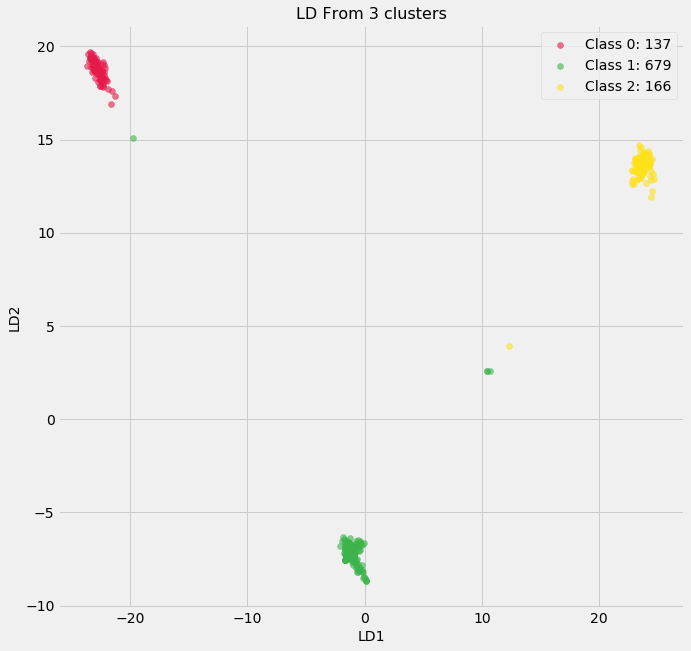

Cluster: 0


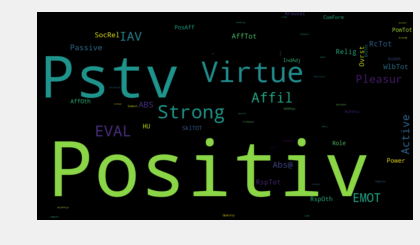

Cluster: 1


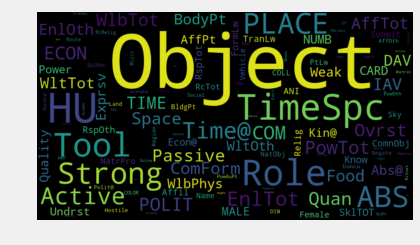

Cluster: 2


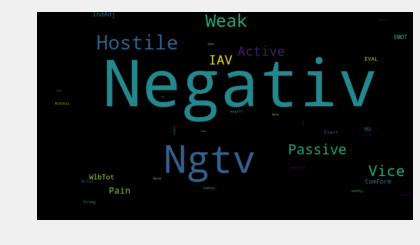

In [48]:
pred_clusters, cluster_labels = KMWordCluster(selected_bag_of_words, 3)

In [51]:
selected_bag_of_words_neutral = selected_bag_of_words[selected_bag_of_words["word"].isin(cluster_labels[1])]

Num of Words: 679
Counter({1: 386, 3: 137, 2: 78, 0: 44, 4: 34})


/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


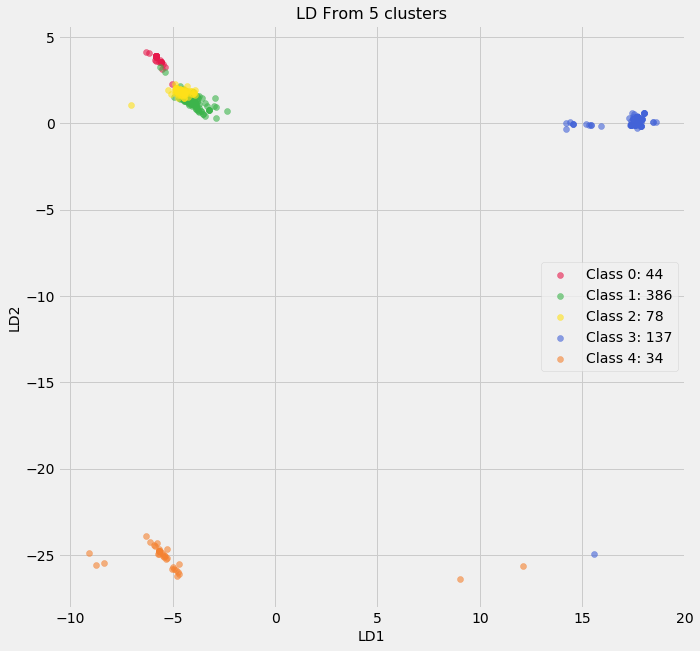

Cluster: 0


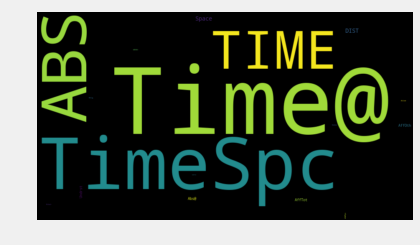

Cluster: 1


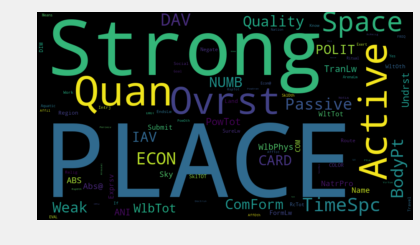

Cluster: 2


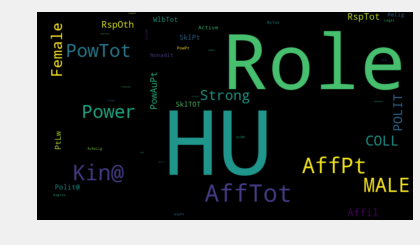

Cluster: 3


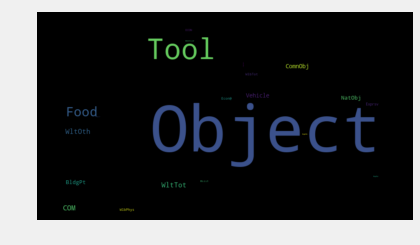

Cluster: 4


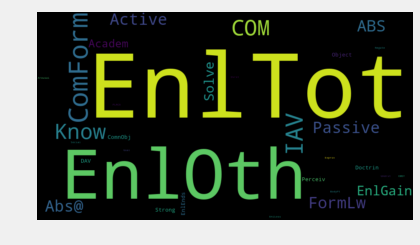

In [56]:
pred_clusters_neural, cluster_labels_neutral = KMWordCluster(selected_bag_of_words_neutral, 5)

In [61]:
cluster_labels_neutral[2]

['army',
 'believer',
 'boss',
 'boy',
 'bride',
 'brother',
 'buddy',
 'captain',
 'child',
 'children',
 'class',
 'cop',
 'cousin',
 'crew',
 'dad',
 'daddy',
 'dancer',
 'daughter',
 'dealer',
 'designer',
 'dr',
 'driver',
 'ego',
 'family',
 'father',
 'female',
 'gang',
 'generation',
 'gentlemen',
 'ghost',
 'girl',
 'god',
 'grandma',
 'guy',
 'husband',
 'king',
 'lady',
 'lawyer',
 'leader',
 'lord',
 'mama',
 'men',
 'mister',
 'mob',
 'mother',
 'nation',
 'papa',
 'parent',
 'person',
 'player',
 'police',
 'preacher',
 'president',
 'pro',
 'queen',
 'rider',
 'role',
 'self',
 'singer',
 'sir',
 'sister',
 'society',
 'soldier',
 'son',
 'soul',
 'speaker',
 'squad',
 'stranger',
 'teacher',
 'team',
 'teenage',
 'twin',
 'uncle',
 'victim',
 'wife',
 'winner',
 'woman',
 'women']